In [47]:
# from statistics import median
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import nmrglue as ng


# import pulsee.simulation as sim
from plot_dm import plot_complex_density_matrix

import tomography_helper_functions
import tomography_helper_functions as helper
# from tomography.tomography_helper_functions import projection_fortunato, plot_spectra_together
# from tomography.tomography_helper_functions import index_to_element, integrate_simpson, integrate_optimized

# import * is bad practice, but this is the easiest way to do quick theoretical calculations with this many variables.
import operators as op
import global_constants as glob
from coeff_groups_class import CoefficientGroups

from temporal_average import temporal_average

# commented out cuz it causes my computer to not plot anything:
#%matplotlib notebook

plt.rcParams['figure.dpi'] = glob.DPI_DISPLAY

In [48]:
# DIFFERENT FOR THIS MEASUREMENT!
SPECTRUM_WIDTH = 2000  # Hz


# assert np.array_equal(freqs, freqs_local)

#B_0 = 14.0921  # Tesla
J = 21.59  # Hz
L_FREQ = -J/2
R_FREQ = J/2
PHASE_0=-59
#15=0.8758057403799121
#35=0.8678271596689194
#-10=0.893466169581499
# probably won't need...?
#SPECTRUM_OFFSET = 49697.66
#w_1_Bruker = 202474441.0  # Hz
#w_2_Bruker = 202475194.8  # Hz
#TEMP = 310  # Kelvin

# Importing Data
Rearranged folders (from Donny's usual format) so that both P1 and P2 files are in the same folder. This way I don't have to deal with separate "P1" and "P2" folders.

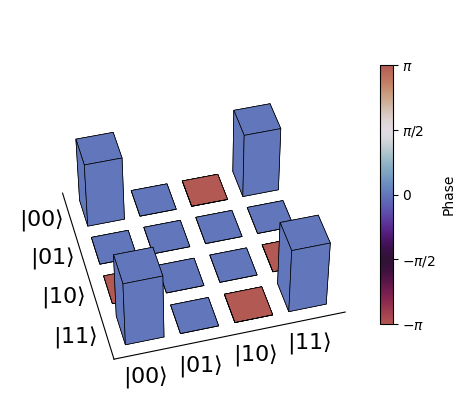

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 4.99999996e-01  0.00000000e+00 -1.34015773e-16  4.99999996e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.34015773e-16  0.00000000e+00  3.59204552e-32 -1.34015773e-16]
 [ 4.99999996e-01  0.00000000e+00 -1.34015773e-16  4.99999996e-01]]

In [49]:
state_name = "1000BP_ns1_358"
rho_theory = rho_theory = op.CNOT_Phased*op.H_1*op.CLEAN_1000*op.H_1.dag()*op.CNOT_Phased.dag()
plot_complex_density_matrix(rho_theory)
display(rho_theory)

In [50]:
Bell_1000 = op.CNOT_Phased*op.H_1*op.CLEAN_1000*op.H_1.dag()*op.CNOT_Phased.dag()
Bell_0100 = op.CNOT_Phased*op.H_1*op.CLEAN_0100*op.H_1.dag()*op.CNOT_Phased.dag()
Bell_0010 = op.CNOT_Phased*op.H_1*op.CLEAN_0010*op.H_1.dag()*op.CNOT_Phased.dag()
Bell_0001 = op.CNOT_Phased*op.H_1*op.CLEAN_0001*op.H_1.dag()*op.CNOT_Phased.dag()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 4.99999996e-01  0.00000000e+00 -1.34015773e-16  4.99999996e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.34015773e-16  0.00000000e+00  3.59204552e-32 -1.34015773e-16]
 [ 4.99999996e-01  0.00000000e+00 -1.34015773e-16  4.99999996e-01]]
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1.5 0.  0.  0. ]
 [0.  1.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]


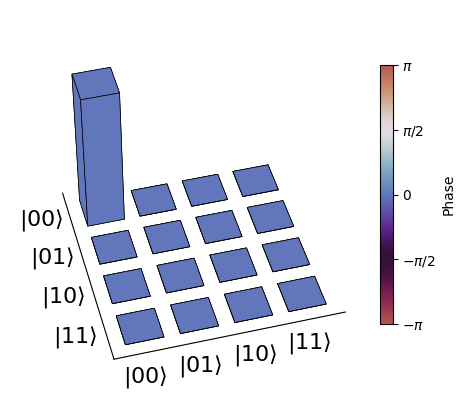

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]

In [85]:
print(Bell_1000)
print(op.IDENTITY+op.Iz)
plot_complex_density_matrix(1/4*op.IDENTITY++1/2*op.Iz++1/2*op.Sz+op.IzSz)
op.Iz

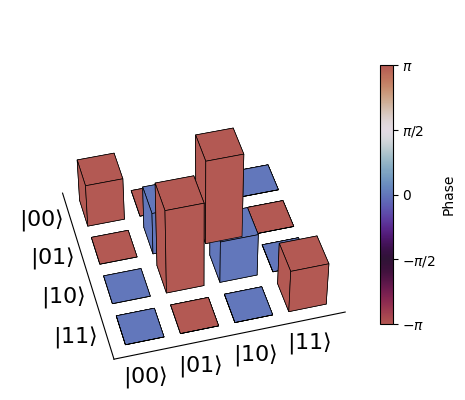

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-3.33333331e-01 -1.08392263e-17  2.16784527e-17  5.21721703e-10]
 [-1.08392263e-17  3.33333328e-01 -6.66666662e-01 -1.57009245e-16]
 [ 2.16784527e-17 -6.66666662e-01  3.33333328e-01  1.67848471e-16]
 [ 5.21721703e-10 -1.57009245e-16  1.67848471e-16 -3.33333331e-01]]


In [60]:
LLS=Bell_0001-(1/3)*(Bell_1000 +Bell_0100 + Bell_0010 )
plot_complex_density_matrix(LLS)
print(LLS)

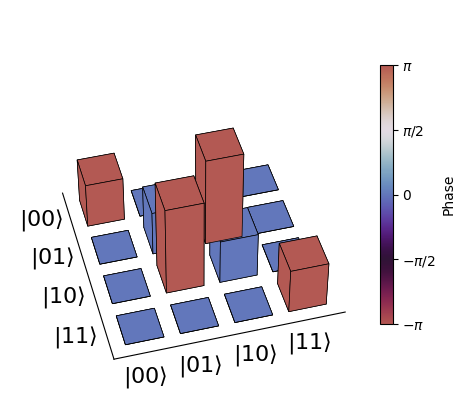

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.33333333  0.          0.          0.        ]
 [ 0.          0.33333333 -0.66666667  0.        ]
 [ 0.         -0.66666667  0.33333333  0.        ]
 [ 0.          0.          0.         -0.33333333]]


In [61]:
plot_complex_density_matrix(-4/3*(op.IxSx+op.IySy+op.IzSz))
print(-4/3*(op.IxSx+op.IySy+op.IzSz))

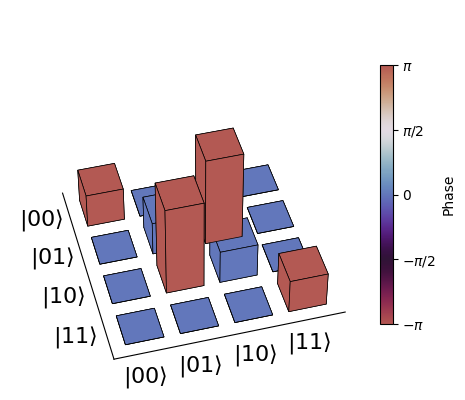

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.25        0.          0.          0.        ]
 [ 0.          0.25       -0.66666667  0.        ]
 [ 0.         -0.66666667  0.25        0.        ]
 [ 0.          0.          0.         -0.25      ]]


In [68]:
plot_complex_density_matrix(-4/3*(op.IxSx+op.IySy+3/4*op.IzSz))
print(-4/3*(op.IxSx+op.IySy+3/4*op.IzSz))

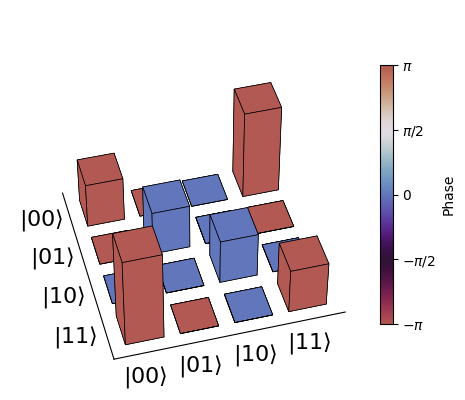

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-3.33333331e-01 -1.08392263e-17  2.16784527e-17 -6.66666662e-01]
 [-1.08392263e-17  3.33333328e-01  5.21721703e-10 -1.57009245e-16]
 [ 2.16784527e-17  5.21721703e-10  3.33333328e-01  1.67848471e-16]
 [-6.66666662e-01 -1.57009245e-16  1.67848471e-16 -3.33333331e-01]]
Partial Transposed Density Matrix:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[-3.33333331e-01 -1.08392263e-17  2.16784527e-17 -6.66666662e-01]
 [-1.08392263e-17  3.33333328e-01  5.21721703e-10 -1.57009245e-16]
 [ 2.16784527e-17  5.21721703e-10  3.33333328e-01  1.67848471e-16]
 [-6.66666662e-01 -1.57009245e-16  1.67848471e-16 -3.33333331e-01]]

Eigenvalues of the Partial Transposed Density Matrix:
[-0.99999999  0.33333333  0.33333333  0.33333333]


In [62]:

# Compute the partial transpose with respect to the second subsystem
pt_rho = qt.partial_transpose(LLS, [1, 0])
plot_complex_density_matrix(pt_rho)
print(pt_rho)

# Compute the eigenvalues of the partial transpose
eigenvalues = pt_rho.eigenenergies()

# Display the results
print("Partial Transposed Density Matrix:")
print(pt_rho)
print("\nEigenvalues of the Partial Transposed Density Matrix:")
print(eigenvalues)

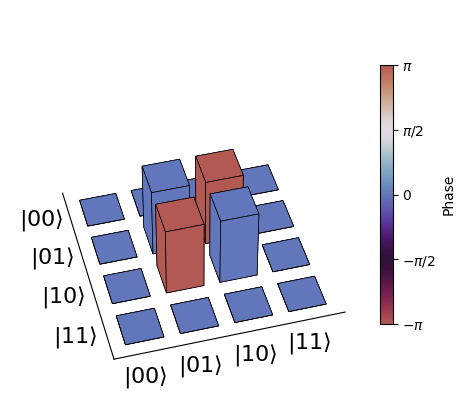

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [63]:
plot_complex_density_matrix(1/4*op.IDENTITY-(op.IxSx+op.IySy+op.IzSz))

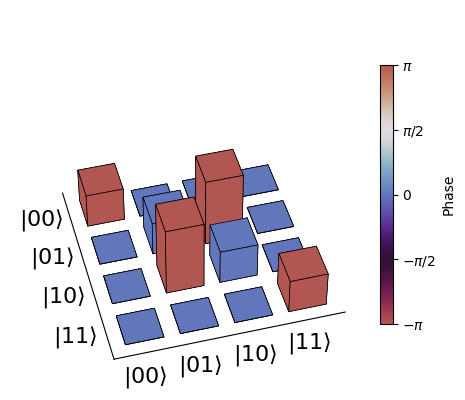

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.25  0.    0.    0.  ]
 [ 0.    0.25 -0.5   0.  ]
 [ 0.   -0.5   0.25  0.  ]
 [ 0.    0.    0.   -0.25]]


In [64]:
plot_complex_density_matrix(-(op.IxSx+op.IySy+op.IzSz))
print(-(op.IxSx+op.IySy+op.IzSz))

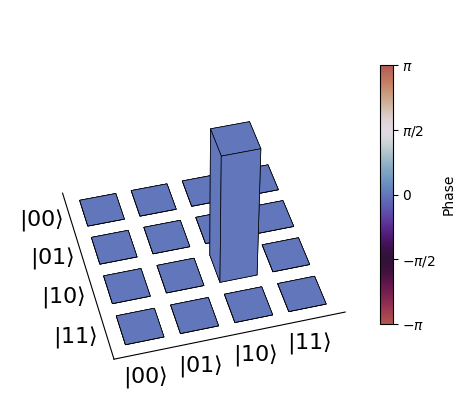

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [66]:
plot_complex_density_matrix(1/4*op.IDENTITY-op.IzSz-1/2*(op.Iz-op.Sz))

In [ ]:
state_name = "1000BP_ns1_358"
rho_theory = rho_theory = op.CNOT_Phased*op.H_1*op.CLEAN_1000*op.H_1.dag()*op.CNOT_Phased.dag()
plot_complex_density_matrix(rho_theory)
display(rho_theory)